<CENTER>
    <a href="http://opendata.atlas.cern" class="icons"><img src="../Assets/ATLASOD.gif" style="width:50%"></a>
</CENTER>

<CENTER><h1>Simple CVS to ROOT C++ notebook example</h1></CENTER>

In [1]:
//%jsroot on

In [2]:
#include "Riostream.h"
#include "TString.h"
#include "TFile.h"
#include "TTree.h"
#include "TSystem.h"
#include <stdio.h>
#include <stdlib.h>

In [3]:
//This two lines can be commented out. You just need it once, and in case the CVS file was not provided already
system("rm outreach.csv");
system("wget http://opendata.atlas.cern/visualisations/CrossFilter/outreach.csv");

//If the file is downloaded with the line above, you *need* to remove the first line of the outreach.csv

In [4]:
TString dir = gSystem->UnixPathName(__FILE__);
dir.ReplaceAll("outreach.C","");
dir.ReplaceAll("/./","/");

TFile *f = new TFile("outreach.root","RECREATE");

In [5]:
TTree *tree = new TTree("ntuple","data from csv file");
// The file inside has ---->   type,  Channel,  NJets,  MET,  Mll,  LepDeltaPhi,  METLLDeltaPhi,  SumLepPt,  BTags,  weight
tree->ReadFile("outreach.csv","type/I:Channel/I:NJets/I:MET/F:Mll/F:LepDeltaPhi/F:METLLDeltaPhi/F:SumLepPt/F:BTags/F:weight/F",',');
f->Write();

Warning in <TTree::ReadStream>: Couldn't read formatted data in "type" for branch type on line 1; ignoring line
Warning in <TTree::ReadStream>: Read too few columns (1 < 10) in line 1; ignoring line


note that the line above generates a warning. This is because the first line of our CSV file contains the name of the colunms, but this is safely ignored by ROOT.

In [6]:
system("ls -lhrt outreach.*");

-rw-r--r-- 1 summerstudent users 8.4M Sep  4 00:28 outreach.csv
-rw-r--r-- 1 summerstudent users 3.0M Sep  7 19:12 outreach.root


Note in the output of the line above that the resulting ROOT files is ~35% of the size of the original SV file. This is another advantage of the ROOT format for this kind of datasets.

In [7]:
TFile *_file0 = TFile::Open("outreach.root");

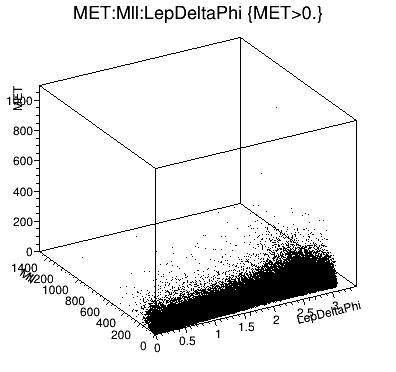

In [8]:
TCanvas *c3D = new TCanvas("c3D","c3D",10,10,400,400);
ntuple->Draw("MET:Mll:LepDeltaPhi","MET>0.");
c3D->Draw();

In [9]:
TCanvas *cz = new TCanvas("cz","cz",10,10,400,400);
ntuple->Draw("Mll:MET","weight>-999","colz");

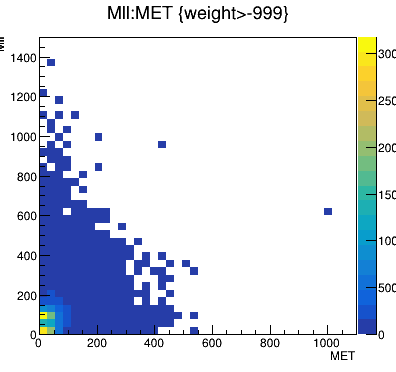

In [10]:
cz->Draw();

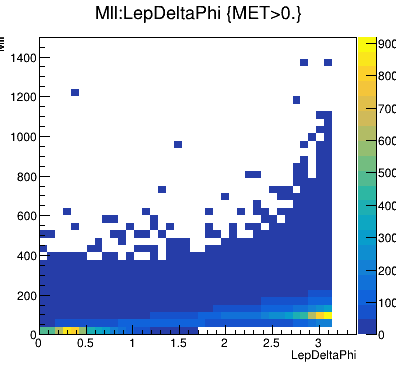

In [11]:
TCanvas *c2D = new TCanvas("c2D","c2D",10,10,400,400);
ntuple->Draw("Mll:LepDeltaPhi","MET>0.","colz");
c2D->Draw();

Below you can try to create a more complex analysis, following what is done in the next notebooks examples in this repository.